# Options pricing using Geometric Brownian Motion and Monte-Carlo simulation

## Importing used libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
%matplotlib inline

C:\Users\cleme\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


## Paramaters for simulating GBM

In [5]:
#Number of steps of our simulation :
n=100
#Number of simulations :
M=500
#Time
T=1
#Volatily 
s=0.3
#Drift coefficient:
µ=0.15
#Initial price 
S0=100

## Simulation and plot

In [11]:
#Calculating each time step 
t=T/n
#Simulating our GBM using numpy
S_t=np.exp((µ-s**2/2)*t+s*np.random.normal(0,np.sqrt(t), size=(M,n)).T) #Transposing our array
S_t = np.vstack([np.ones(M),S_t]) #Stacking our Vector S_t with array of 1 so that we have a new axis full of 1.
#Had we did it with np.zeros we would have get only 0 for every coefficient.
S_t=S0 * S_t.cumprod(axis=0) #cumulative product of our matrix on each row,
#meaning that we are multiplying each coefficient at every step t by S0
#printing one branch to see the actual result
S_t[1]

array([102.56704317, 100.70082074, 102.34187325,  98.05206215,
        97.2090888 , 101.0410469 ,  99.17977475,  95.8870888 ,
        98.36143502, 100.7516415 ,  98.29163086,  99.19354929,
       102.8240848 ,  98.89329716, 100.22733586, 100.95518644,
       102.14796786,  98.81449381, 102.38970831,  97.22667916,
       101.0996446 , 102.31784905, 100.33425674,  97.69624836,
        96.52575411, 100.76663898, 101.04722835,  99.09417047,
       103.74141165, 100.40433481, 101.59465609,  99.68452388,
        96.57185585,  99.82957675,  98.02715937,  99.82392997,
        99.93350455,  98.96673814, 103.55955431, 100.45777858,
        99.79400627, 102.72911075, 102.32364226,  98.17773429,
        99.24648583,  97.50361095, 100.92075443, 101.76727553,
       100.36030085, 100.31660215,  99.25100411,  97.77162089,
       101.2905546 , 100.53482209, 101.81920013,  99.49642663,
       104.09685354,  99.90202972,  97.44519637, 101.55117851,
        99.57339917, 102.90580742,  97.37324986,  99.28

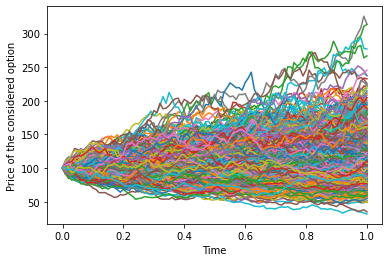

In [15]:
#We now want to convert our steps as a time interval
Time = np.linspace(0,T,n+1) #Getting an array from 0 to 1 (not putting n+1 result in not "round" numbers)
#To plot our results, we have to create a new array with the same format as S_t
S_tcopy=np.full(shape=(M,n+1),fill_value=Time).T

plt.plot(S_tcopy,S_t)
plt.xlabel('Time')
plt.ylabel('Price of the considered option')
plt.show()

# Applying this to Google's stock :

## Importing data using yfinance

In [8]:
goog = yf.Ticker('GOOG')
history=goog.history(start='2023-01-23',end='2024-02-23')

## Taking a look at our imported stock prices

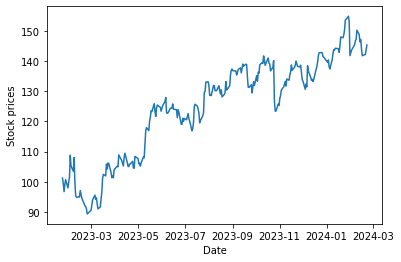

In [9]:
plt.plot(history['Close'])
plt.xlabel('Date')
plt.ylabel('Stock prices')
plt.show()

## Monte Carlo Simulation 

Number of days : 273


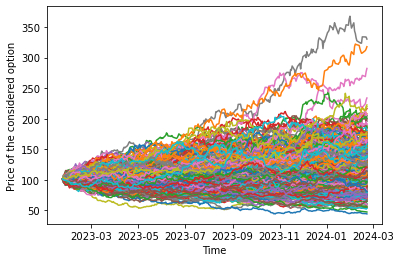

In [12]:
#number of steps
n=len(history)
print('Number of days :', n)
#initializing our array, we before used numpy but since yfinance uses panda, we'll do the same.
S_t = pd.DataFrame(0,index=history.index,columns=list(range(1,M+1))) #Using the same M as before (M=1000) we create a matrix 
#this matrix will contain our stock prices
S_t.iloc[0] = history['Close'].iloc[0] #S_0
for i in range(1,n):
    dS=µ*t+s*np.sqrt(t)*np.random.randn(M) 
    S_t.iloc[i]=S_t.iloc[i-1]+S_t.iloc[i-1]*dS
#after vizualisation we obtain similar graphics, well done !
plt.plot(S_t)
plt.xlabel('Time')
plt.ylabel('Price of the considered option')
plt.show()

## Comparison with reality 

Expected value using Monte Carlo Method :  118.38871452383454
Expected value using Theory :  0    136.46916
Name: 2024-02-22 00:00:00-05:00, dtype: float64
The price of an Asian option is : 18.389


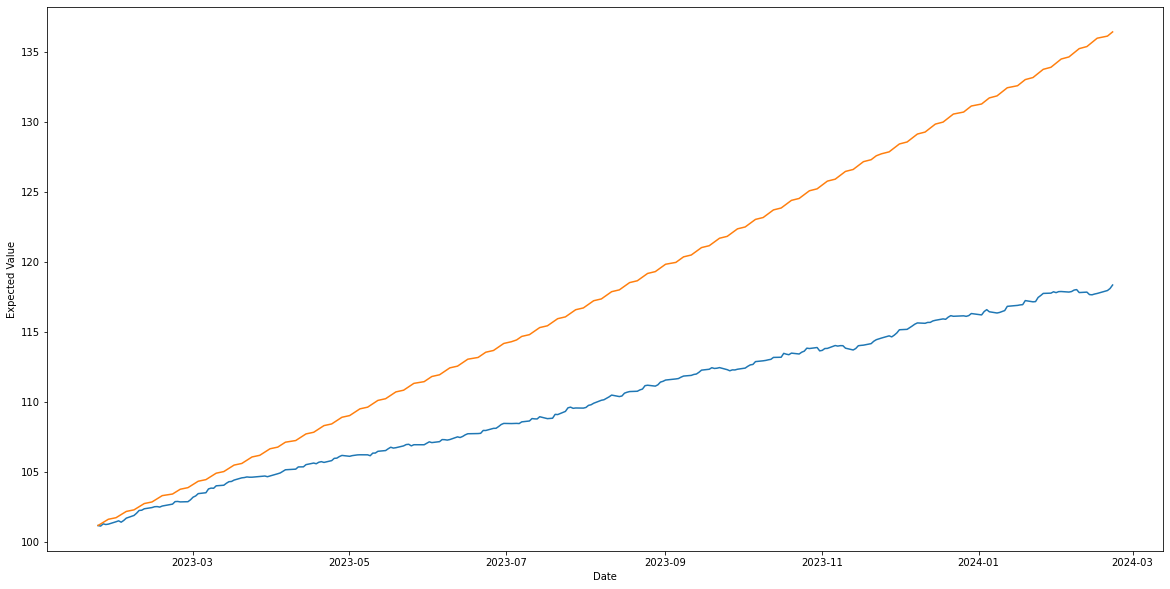

In [46]:
#Mean and volatility
St_mean = S_t.mean(axis=1)
St_thmean = history['Close'].iloc[0] * np.exp(µ*np.arange(n)/n*2) 
#I will turn St_thmean wich is the theoritecal value into a pandaframe so that it's easier to compare 
St_thmean = pd.DataFrame(St_thmean, index=St_mean.index)

print('Expected value using Monte Carlo Method : ', St_mean.iloc[-1])
print('Expected value using Theory : ', St_thmean.iloc[-1])

figure = plt.figure(figsize=(20,10))
axe = figure.add_subplot(111)
plt.plot(St_mean)
plt.plot(St_thmean)
plt.xlabel(('Date'))
plt.ylabel('Expected Value')

#Applying this to the Asian Arithmetic Option :

K=100
Aoption=np.max(St_mean-K,0)
print('The price of an Asian option is :', np.round(Aoption,3))
